this example is used to smooth the moving data movement

In [3]:
def smoothListGaussian(list, degree=5):
    window = degree*2-1
    weight = numpy.array([1.0]*window)
    weightGauss = []
    for i in range(window):
        i = i-degree+1
        frac = i/float(window)
        gauss = 1/(numpy.exp((4*(frac))**2))
        weightGauss.append(gauss)
    weight = numpy.array(weightGauss)*weight
    smoothed = [0.0]*(len(list)-window)
    for i in range(len(smoothed)):
        smoothed[i] = sum(numpy.array(list[i:i+window])*weight)/sum(weight)


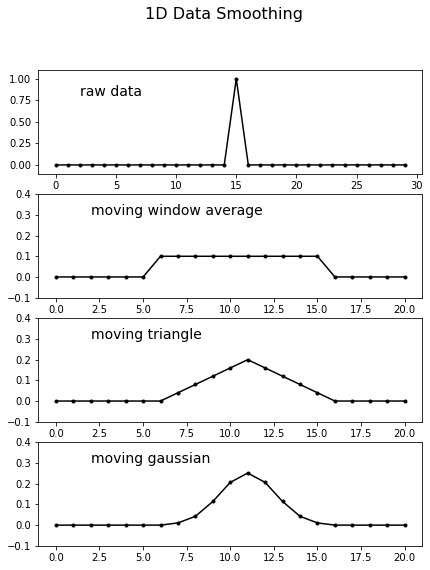

In [4]:
import pylab
import numpy
def smoothList(list, strippedXs=False, degree=10):
    if strippedXs == True:
        return Xs[0:-(len(list)-(len(list)-degree+1))]
    smoothed = [0]*(len(list)-degree+1)
    for i in range(len(smoothed)):
        smoothed[i] = sum(list[i:i+degree])/float(degree)
    return smoothed
def smoothListTriangle(list, strippedXs=False, degree=5):
    weight = []
    window = degree*2-1
    smoothed = [0.0]*(len(list)-window)
    for x in range(1, 2*degree):
        weight.append(degree-abs(degree-x))
    w = numpy.array(weight)
    for i in range(len(smoothed)):
        smoothed[i] = sum(numpy.array(list[i:i+window])*w)/float(sum(w))
    return smoothed
def smoothListGaussian(list, strippedXs=False, degree=5):
    window = degree*2-1
    weight = numpy.array([1.0]*window)
    weightGauss = []
    for i in range(window):
        i = i-degree+1
        frac = i/float(window)
        gauss = 1/(numpy.exp((4*(frac))**2))
        weightGauss.append(gauss)
    weight = numpy.array(weightGauss)*weight
    smoothed = [0.0]*(len(list)-window)
    for i in range(len(smoothed)):
        smoothed[i] = sum(numpy.array(list[i:i+window])*weight)/sum(weight)
    return smoothed
### DUMMY DATA ###
data = [0]*30  # 30 "0"s in a row
data[15] = 1  # the middle one is "1"
### PLOT DIFFERENT SMOOTHING FUNCTIONS ###
pylab.figure(figsize=(550/80, 700/80))
pylab.suptitle('1D Data Smoothing', fontsize=16)
pylab.subplot(4, 1, 1)
p1 = pylab.plot(data, ".k")
p1 = pylab.plot(data, "-k")
a = pylab.axis()
pylab.axis([a[0], a[1], -.1, 1.1])
pylab.text(2, .8, "raw data", fontsize=14)
pylab.subplot(4, 1, 2)
p1 = pylab.plot(smoothList(data), ".k")
p1 = pylab.plot(smoothList(data), "-k")
a = pylab.axis()
pylab.axis([a[0], a[1], -.1, .4])
pylab.text(2, .3, "moving window average", fontsize=14)
pylab.subplot(4, 1, 3)
p1 = pylab.plot(smoothListTriangle(data), ".k")
p1 = pylab.plot(smoothListTriangle(data), "-k")
pylab.axis([a[0], a[1], -.1, .4])
pylab.text(2, .3, "moving triangle", fontsize=14)
pylab.subplot(4, 1, 4)
p1 = pylab.plot(smoothListGaussian(data), ".k")
p1 = pylab.plot(smoothListGaussian(data), "-k")
pylab.axis([a[0], a[1], -.1, .4])
pylab.text(2, .3, "moving gaussian", fontsize=14)
# pylab.show()
pylab.savefig("smooth.png", dpi=80)